In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import numpy as np

diabet_data = pd.read_csv('c:/IDE/Data/diabetes.csv', sep=',')
display(diabet_data.head())
display(diabet_data.tail())
diabet_data.shape




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


(768, 9)

In [106]:
diabet_data.info() #Выводим краткую иформацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


В таблице нет значений NaN

In [107]:
diabet_data.describe() # Краткие статистические данные

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Для первичного анализа факторов, связанных с развитием диабета постоим коробчатые диараммы в зависимости от наличия или отсутствия диабета (Outcome: 0 или 1)

In [108]:

def boxplot_diabet(a,i):
    '''Эта функция принимает значение а (исследуемый фактор) и возвращает коробчатую диаграмму зависимости фактора от наличия или отсутствия диабета'''
    b= boxplot = sns.boxplot(
        data=diabet_data,
        y='Outcome',
        x=a,
        orient='h',
        width=0.9,
        ax=axes[i]
    )    
    return b




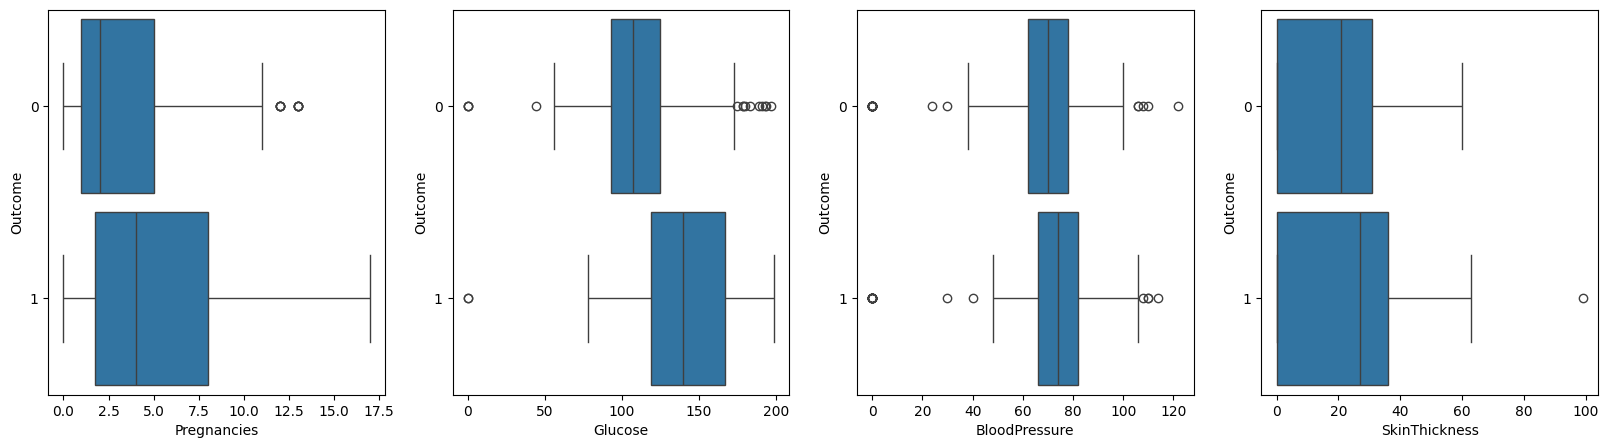

In [109]:
numerics_1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
for index, name in enumerate(numerics_1):
    boxplot_diabet(name, index)

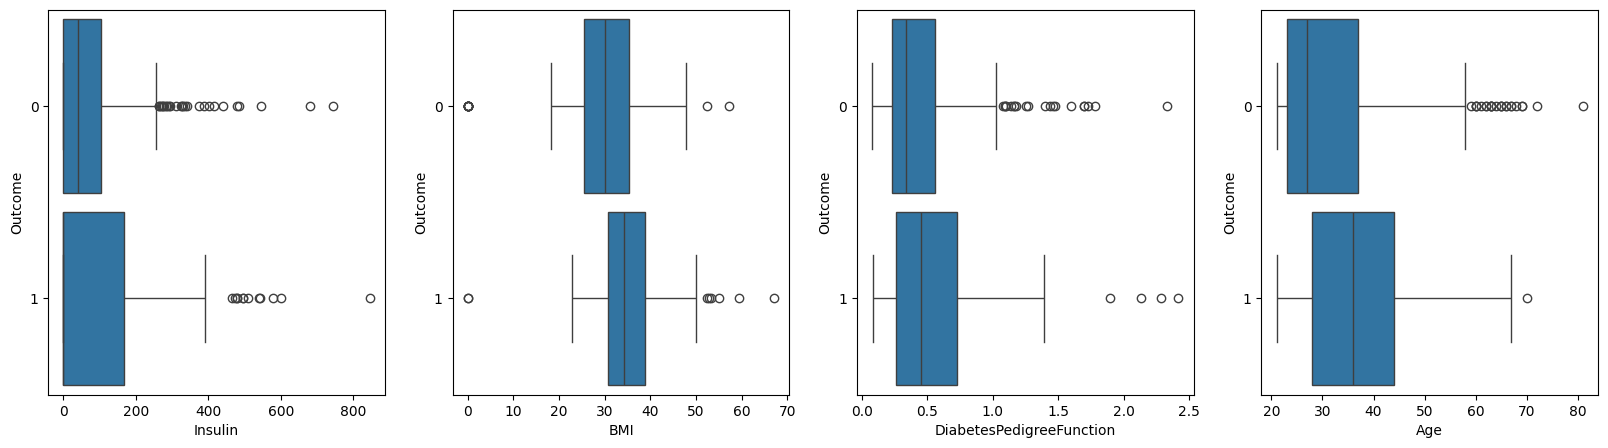

In [110]:
numerics_2 = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
for index, name in enumerate(numerics_2):
    boxplot_diabet(name, index)

 На основе min значений и диаграмм, в таких показателях,  как 'Glucose', 'BloodPressure', 'SkinThickness',	'Insulin',	'BMI' в таблице, есть значения равные 0. Это противоречит логике. В этих столбцах неизвестные данные заменены 0. Заменим 0 на значение NaN

In [111]:
numerics =  'Glucose', 'BloodPressure', 'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction', 'Age'
def nan_zero(c):
    """Эта функция принимает столбец таблицы и заменяет в столбце 0 на NaN"""
    d=diabet_data[c] = diabet_data[c].apply(lambda x: np.nan if x==0 else x)
    return d
for c in numerics:
    nan_zero(c)
diabet_data.isnull().sum()   

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

'SkinThickness', 'Insulin' количество пропусков больше 30%. Данные будут недостоверны.
Построим коробчатые диаграммы без этих значений

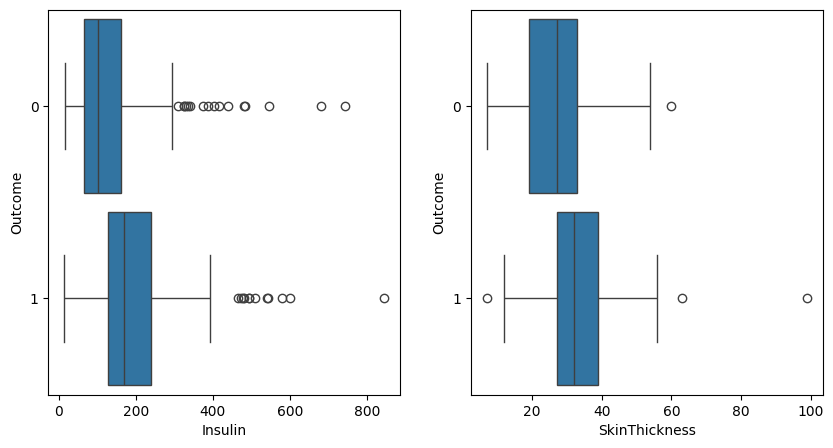

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
boxplot = sns.boxplot(
    data=diabet_data[diabet_data['Insulin']!=None],
    y='Outcome',
    x='Insulin' ,
    orient='h',
    width=0.9,
    ax=axes[0]
)
boxplot = sns.boxplot(
    data=diabet_data[diabet_data['SkinThickness']!=None],
    y='Outcome',
    x='SkinThickness' ,
    orient='h',
    width=0.9,
    ax=axes[1]
)

По новым, уточненным данным, видна четкая зависимость уровня инсулина в крови и тощины кожной складки на трицепсе (у больных сахарным диабетом показатель выше)

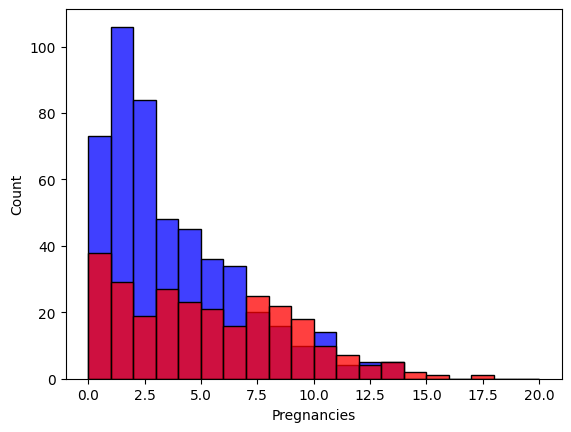

In [113]:
#Для количества беременностей построим дополнительно гистограмму, чтобы уточнить зависимость
c_bins=np.arange(0,21,1)

sns.histplot(
    data=diabet_data[diabet_data['Outcome']==0],
    x='Pregnancies',
    bins=c_bins,
    color='blue'
);
sns.histplot(
    data=diabet_data[diabet_data['Outcome']==1],
    x='Pregnancies',
    bins=c_bins,
    color='red'
);

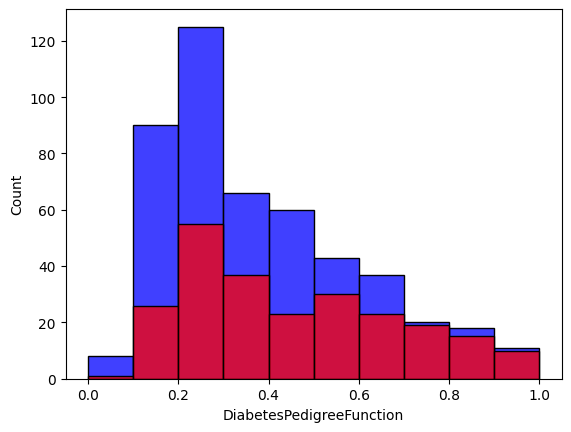

In [114]:
#Для предистории диабета построим дополнительно гистограмму, чтобы уточнить зависимость
c_bins=np.arange(0,1.1,0.1)

sns.histplot(
    data=diabet_data[diabet_data['Outcome']==0],
    x='DiabetesPedigreeFunction',
    bins=c_bins,
    color='blue',
);
sns.histplot(
    data=diabet_data[diabet_data['Outcome']==1],
    x='DiabetesPedigreeFunction',
    bins=c_bins,
    color='red'
);

На основе полученных данных делаем выводы: факторы связанные с развитием диабета - количество беременностей ('Pregnancies'), концентрация глюкозы в плазме крови через 2 часа  ('Glucose'), , толщина кожной складки на трицепсе ('SkinThickness'),	2-часовой сывороточный инсулин ('Insulin'), индекс массы тела ('BMI'), возраст ('Age') (у больных диабетом показатели выше) 
'BloodPressure' фактор не влияющий на развитие диабета
'DiabetesPedigreeFunction' фактор, требующий больше данных (много выбросов в категории здоровых людей, распределение показателя у больных сахарным диабетом, похоже с распределением здоровых людей )

Обработаем пропущенные значения:

In [115]:
#Удалим из таблицы столбцы 'SkinThickness', 'Insulin', т.к. здесь пропущенных значений больше 30% и данных столбцов нет в других таблицах 
diabet_data_n = diabet_data.drop(columns=['SkinThickness','Insulin'], axis=1)
display(diabet_data_n)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


Заменим NaN  на медианные значения

In [116]:
values = {
    'Glucose': diabet_data_n['Glucose'].median(),
    'BloodPressure': diabet_data_n['BloodPressure'].median(),
    'BMI': diabet_data_n["BMI"].median()
}
diabet_data_f = diabet_data_n.fillna(values)
diabet_data_f.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Выведем статистичские данные обдельно для женщин с диабетом и без

In [117]:
diabet_data_0 = diabet_data_f[diabet_data_f['Outcome'] == 0] #
diabet_data_0.shape



(500, 7)

In [118]:
diabet_data_1 = diabet_data_f[diabet_data_f['Outcome'] == 1]
diabet_data_1.shape


(268, 7)

In [119]:
diabet_data_0.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.682000,70.920000,30.885600,0.429734,31.190000,0.0
std,3.017185,24.707201,11.929385,6.504128,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,63.500000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.500000,72.000000,30.400000,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,57.300000,2.329000,81.000000,0.0


In [120]:
diabet_data_1.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.130597,75.123134,35.383582,0.550500,37.067164,1.0
std,3.741239,29.568839,11.951672,6.595603,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,67.100000,2.420000,70.000000,1.0


In [121]:
diabet_data_f.corr()['Outcome'].sort_values(ascending=False)#попарная корреляция  значений 

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

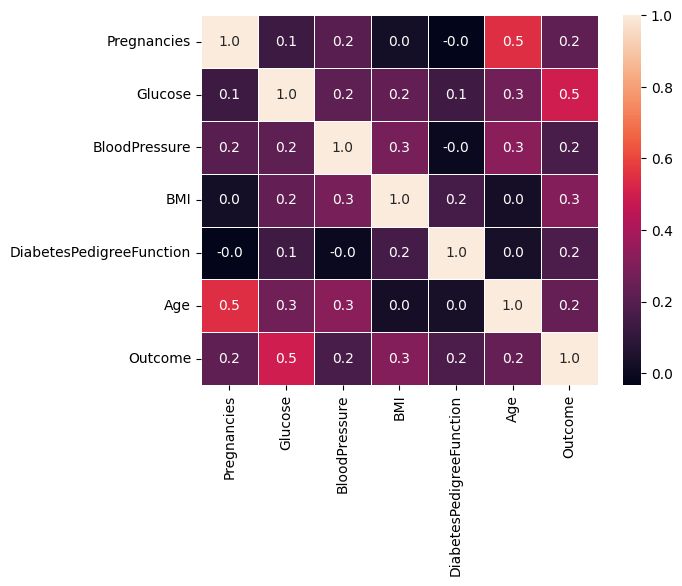

In [122]:
sns.heatmap(diabet_data_f.corr(), annot=True, fmt='.1f', linewidths=0.5);# построим тепловую карту с попарной корреляцией

Наибольший уровень корреляции 'Outcome' с уровнем глюкозы в крови и индексом массы тела.


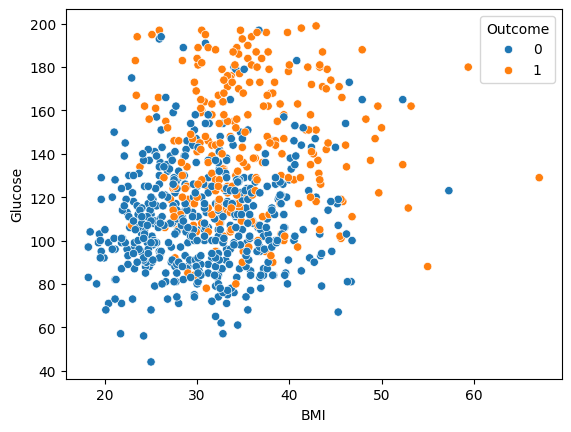

In [123]:
#построbм диаграмму рассеивания для этих трех признаков
sns.scatterplot(
    data=diabet_data_f,
    x="BMI",
    y="Glucose",
    hue='Outcome'
);

У пациентов с сахарным диабетом показатели выше.

Загружаем второй датасет

In [124]:
cardio_data = pd.read_csv('c:/IDE/Data/train.csv', sep=',')# загружаем второй датасет, выводим краткую информацию
display(cardio_data.head())
display(cardio_data.tail())
cardio_data.info()
cardio_data.shape

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

(3390, 17)

In [125]:
cardio_data.isnull().sum()#определим количесво пропусков по столбцам

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [126]:
cardio_data.describe() #краткая статистика

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Так как в первом датасете была выборка из женщин, отсортируем второй датасет по полу

In [127]:
cardio_data_f = cardio_data[cardio_data['sex']=='F']
cardio_data_f.shape


(1923, 17)

In [128]:
cardio_data_F = cardio_data_f.copy()
cardio_data_F.rename(columns={'glucose':'Glucose', 'diaBP':'BloodPressure', 'age':'Age', 'diabetes':'Outcome'}, inplace=True)
display(cardio_data_F.head())

,id,Age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,Outcome,totChol,sysBP,BloodPressure,BMI,heartRate,Glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0


In [129]:
diabet_data_2 = pd.concat([diabet_data_f, cardio_data_F], join='inner',ignore_index=True) # объединяем два датасета по общим колонкам
display(diabet_data_2.head())
display(diabet_data_2.tail())


,Glucose,BloodPressure,BMI,Age,Outcome
0,148.0,72.0,33.6,50,1
1,85.0,66.0,26.6,31,0
2,183.0,64.0,23.3,32,1
3,89.0,66.0,28.1,21,0
4,137.0,40.0,43.1,33,1


,Glucose,BloodPressure,BMI,Age,Outcome
2686,77.0,85.0,26.59,57,0
2687,113.0,86.0,26.98,61,0
2688,103.0,79.0,29.28,60,0
2689,84.0,56.0,21.96,46,0
2690,92.0,77.0,29.88,54,0


In [130]:
diabet_data_2.isnull().sum()

Glucose          213
BloodPressure      0
BMI                9
Age                0
Outcome            0
dtype: int64

In [131]:
#заменим пропуски на медианные значения
values = {
    'Glucose': diabet_data_2['Glucose'].median(),
    'BMI': diabet_data_2["BMI"].median()
}
diabet_data_f2 = diabet_data_2.fillna(values)
diabet_data_f2.isnull().sum()

Glucose          0
BloodPressure    0
BMI              0
Age              0
Outcome          0
dtype: int64

Визуализируем данные для новой таблицы

In [132]:
def boxplot_diabet_2(a,i):
    '''Эта функция принимает значение а (исследуемый фактор) и возвращает коробчатую диаграмму зависимости фактора от наличия или отсутствия диабета'''
    b= boxplot = sns.boxplot(
        data=diabet_data_f2,
        y='Outcome',
        x=a,
        orient='h',
        width=0.9,
        ax=axes[i]
    )    
    return b




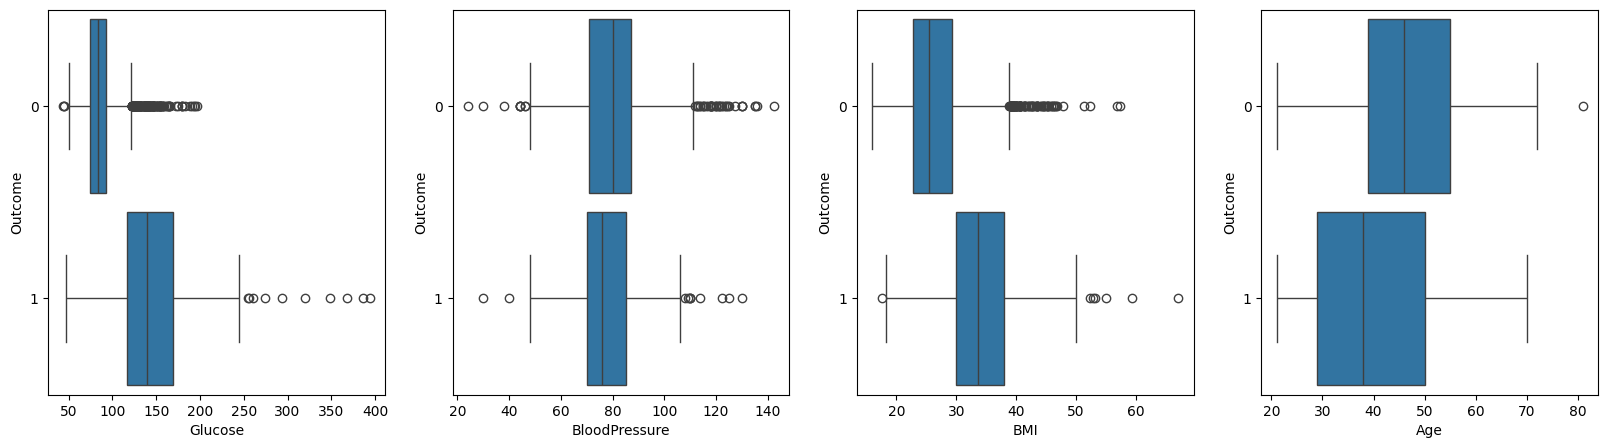

In [133]:
numerics_3 = ['Glucose', 'BloodPressure', 'BMI', 'Age']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
for index, name in enumerate(numerics_3):
    boxplot_diabet_2(name, index)

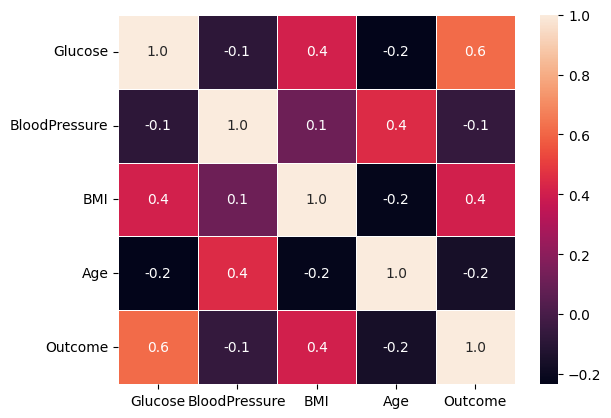

In [134]:
sns.heatmap(diabet_data_f2.corr(), annot=True, fmt='.1f', linewidths=0.5);# построим тепловую карту с попарной корреляцией

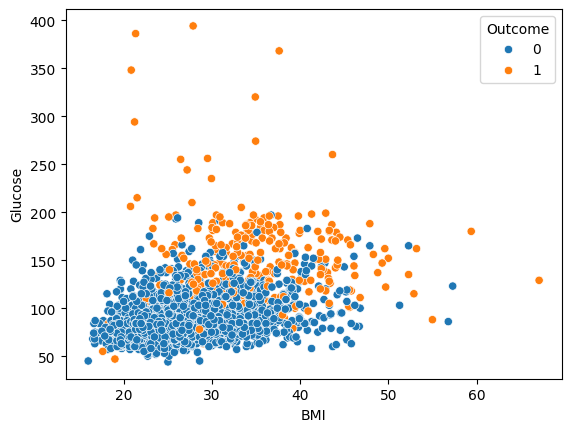

In [135]:
#построbм диаграмму рассеивания для  трех показателей
sns.scatterplot(
    data=diabet_data_f2,
    x="BMI",
    y="Glucose",
    hue='Outcome'
);

Выводы: после увеличения числа иследований стало более выражена зависимость сахарного диабета от уровня глюкозы в крови и ИМТ. С показателем возраст зависимость поменялась.

Загружаем третий датасет.

In [136]:
diabet_binary_data = pd.read_csv('c:/IDE/Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv', sep=',')
display(diabet_binary_data.head())
display(diabet_binary_data.tail())
diabet_binary_data.info()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [137]:
diabet_binary_data.isnull().sum()#определим количесво пропусков по столбцам

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

В таблице нет значений NaN

In [138]:
diabet_binary_data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Из из второго и третьего датасета выберем одинаковые признаки и объединим таблицы.
Сначала подготовим данные к единому формату.

In [139]:
cardio_data['sex'] = cardio_data['sex'].apply(lambda x: 1 if x=='M' else 0)
cardio_data['is_smoking'] = cardio_data['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)
#переводим в категориальные признаки числовые значения
cardio_data['sysBP'] = cardio_data['sysBP'].apply(lambda x: 1 if x>140 else 0)#высоким давлением считается больше 140 мм рт.ст. состолического давления
cardio_data['totChol'] = cardio_data['totChol'].apply(lambda x: 1 if x>200 else 0)# Высокий холестеринвыше 200мг/дл


In [140]:
def age_diabet(age):
    if age>=18 and age<25:
        return 1
    elif age>=25 and age<30:
        return 2
    elif age>=30 and age<35:
        return 3
    elif age>=35 and age<40:
        return 4
    elif age>=40 and age<45:
        return 5
    elif age>=45 and age<50:
        return 6
    elif age>=50 and age<55:
        return 7
    elif age>=55 and age<60:
        return 8
    elif age>=60 and age<65:
        return 9
    elif age>=65 and age<70:
        return 10
    elif age>=70 and age<75:
        return 11
    elif age>=75 and age<80:
        return 12
    elif age>=80:
        return 13


In [141]:
cardio_data['age'] = cardio_data['age'].apply(age_diabet)

In [142]:
display(cardio_data.head())

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,9,2.0,0,1,3.0,0.0,0,0,0,1,1,85.0,NaN,90.0,80.0,1
1,1,4,4.0,1,0,0.0,0.0,0,1,0,1,1,98.0,29.77,72.0,75.0,0
2,2,6,1.0,0,1,10.0,0.0,0,0,0,1,0,71.0,20.35,88.0,94.0,0
3,3,7,1.0,1,1,20.0,0.0,0,1,0,1,1,88.0,28.26,68.0,94.0,1
4,4,9,1.0,0,1,30.0,0.0,0,0,0,1,0,85.0,26.42,70.0,77.0,0


Подотавливаем столбцы в таблицах к объединению

In [143]:
cardio_data_2 = cardio_data.copy()
cardio_data_2.rename(columns={'age':'Age', 'diabetes':'Diabetes_binary', 'sex':'Sex','sysBP':'HighBP', 'is_smoking':'Smoker','totChol':'HighChol'}, inplace=True)
display(cardio_data_2.head())

,id,Age,education,Sex,Smoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,Diabetes_binary,HighChol,HighBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,9,2.0,0,1,3.0,0.0,0,0,0,1,1,85.0,NaN,90.0,80.0,1
1,1,4,4.0,1,0,0.0,0.0,0,1,0,1,1,98.0,29.77,72.0,75.0,0
2,2,6,1.0,0,1,10.0,0.0,0,0,0,1,0,71.0,20.35,88.0,94.0,0
3,3,7,1.0,1,1,20.0,0.0,0,1,0,1,1,88.0,28.26,68.0,94.0,1
4,4,9,1.0,0,1,30.0,0.0,0,0,0,1,0,85.0,26.42,70.0,77.0,0


In [144]:
diabet_data_3 = pd.concat([diabet_binary_data, cardio_data_2], join='inner',ignore_index=True) # объединяем два датасета по общим колонкам
display(diabet_data_3.head())
display(diabet_data_3.tail())

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Sex,Age
0,0.0,1.0,0.0,26.0,0.0,1.0,4.0
1,0.0,1.0,1.0,26.0,1.0,1.0,12.0
2,0.0,0.0,0.0,26.0,0.0,1.0,13.0
3,0.0,1.0,1.0,28.0,1.0,1.0,11.0
4,0.0,0.0,0.0,29.0,1.0,0.0,8.0


,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Sex,Age
74077,0.0,0.0,1.0,29.28,0.0,0.0,9.0
74078,0.0,0.0,0.0,21.96,0.0,0.0,6.0
74079,0.0,1.0,1.0,28.92,1.0,1.0,5.0
74080,0.0,1.0,0.0,23.01,0.0,1.0,9.0
74081,0.0,0.0,1.0,29.88,0.0,0.0,7.0


In [145]:
diabet_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74082 entries, 0 to 74081
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diabetes_binary  74082 non-null  float64
 1   HighBP           74082 non-null  float64
 2   HighChol         74082 non-null  float64
 3   BMI              74068 non-null  float64
 4   Smoker           74082 non-null  float64
 5   Sex              74082 non-null  float64
 6   Age              74082 non-null  float64
dtypes: float64(7)
memory usage: 4.0 MB


In [146]:
diabet_data_3.isnull().sum()

Diabetes_binary     0
HighBP              0
HighChol            0
BMI                14
Smoker              0
Sex                 0
Age                 0
dtype: int64

В столбце 'BMI' есть пропуски, заменяем их на медиану.

In [147]:
values = {
    'BMI': diabet_data_3["BMI"].median()
}
diabet_data_3 = diabet_data_3.fillna(values)
diabet_data_3.isnull().sum()

Diabetes_binary    0
HighBP             0
HighChol           0
BMI                0
Smoker             0
Sex                0
Age                0
dtype: int64

Для категорий с двумя признаками (0, 1) визуализируем количество встречаемости с разбивкой по категории диабет.

In [149]:

def catplot_diabet(a):
    """Эта функция принимает категориальный признак и возвращает график подсчета категории с разбивкой на наличие и отсутствие диабета"""
    b= sns.catplot(
    data=diabet_data_3, 
    x=a, 
    hue='Diabetes_binary', 
    kind='count'
    )
    return b

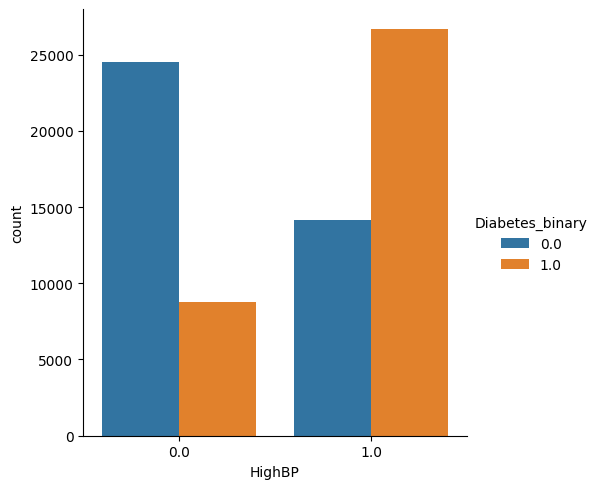

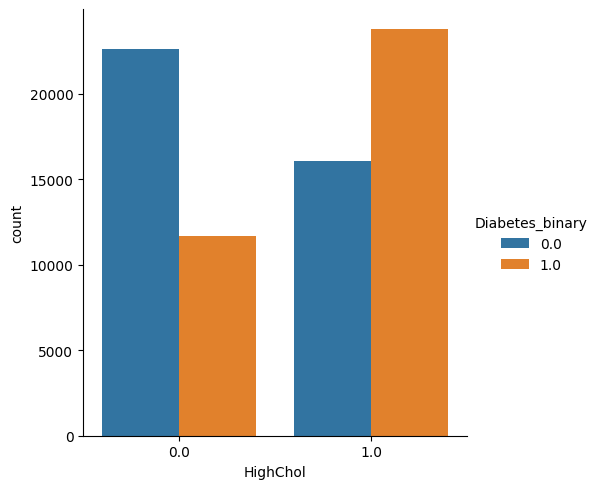

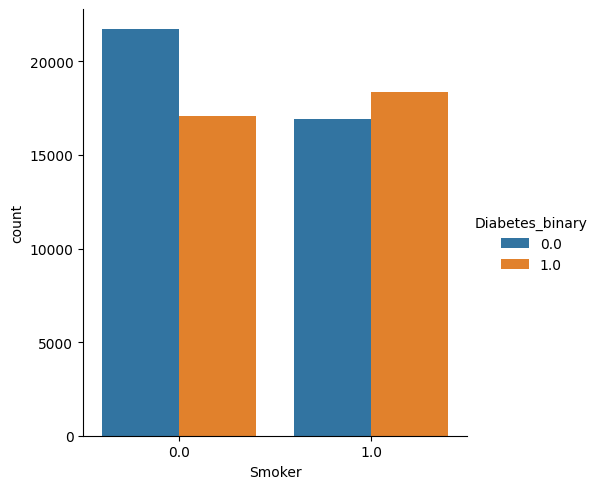

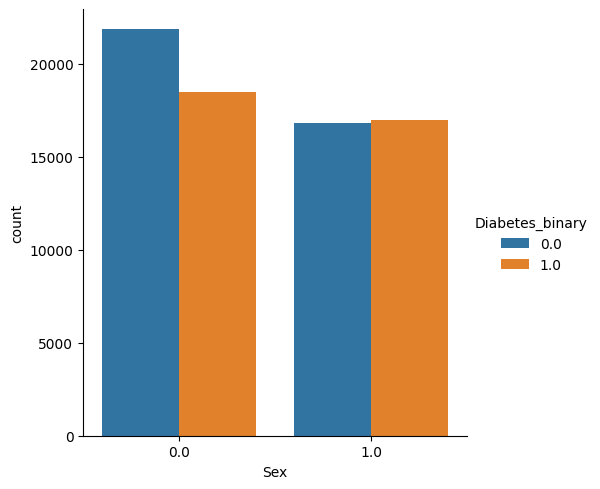

In [150]:
numerics_4 = ['HighBP', 'HighChol', 'Smoker', 'Sex']
for name in numerics_4:
    catplot_diabet(name)

Вывод: развитие диабета зависит от повышенного артериального давления, уровня общего холестерина в крови и не зависит от курения и пола.

Для категории возраста построим гисторгамму и коробчатую диаграмму

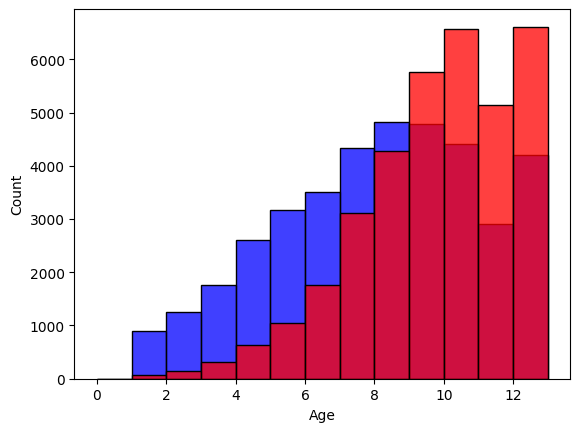

In [151]:
c_bins=np.arange(0,14,1)

sns.histplot(
    data=diabet_data_3[diabet_data_3['Diabetes_binary']==0],
    x='Age',
    bins=c_bins,
    color='blue'
);
sns.histplot(
    data=diabet_data_3[diabet_data_3['Diabetes_binary']==1],
    x='Age',
    bins=c_bins,
    color='red'
);

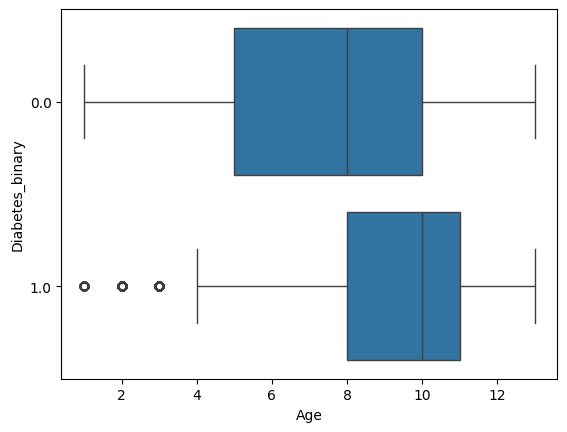

In [152]:
sns.boxplot(
    data=diabet_data_3,
    x='Age',
    y='Diabetes_binary',
    orient='h'
);

Вывод: сахарный диабет всиречается чаще в более старшем возрасте. Медианное значение возраста у больных сахарным диабетом 10(65-70лет), у здоровых 8(55-60лет)

Для ИМТ построим скрипичный график

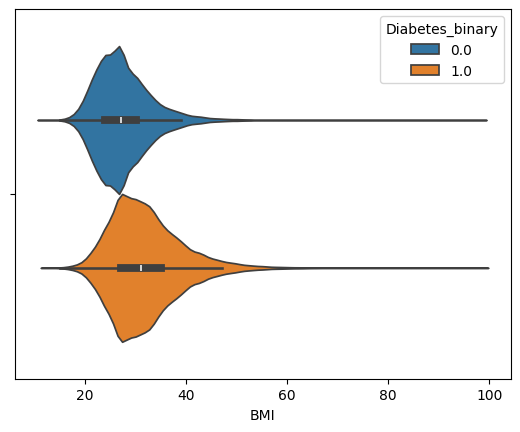

In [157]:
sns.violinplot(
    data=diabet_data_3,
    x='BMI',
    hue='Diabetes_binary' 
);

Вывод: у больных сахарным диабетом ИМТ выше